In [1]:
from t_tools import *
from trpca import trpca
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity

In [2]:
#generate a low rank tensor L_0
n = 50     #size of each dimension (3 dimension tensor)
rank = 5   #rank of the tensor

A = np.random.normal(0,1/n,(n,rank,n)) #random tensor
B = np.random.normal(0,1/n,(rank,n,n)) #random tensor
L_0 = t_prod(A, B)                     #random low-rank tensor

In [3]:
#generate an example problem: recover L_0 (and C_0) when given M_0
rho = .1   #proportion of corrupted entries
var = 1    #variance of the normal distribution generating the noise
def add_noise(L_0, rho, var):
    S_0 = np.random.binomial(1,rho, L_0.shape)  #affected entries
    N   = np.random.normal(0, var, L_0.shape)   #noise into affected entries
    C_0 = S_0 * N

    return(C_0 + L_0, C_0)

M_0, C_0 = add_noise(L_0, rho, var)

In [4]:
#apply algorithm
L , C = trpca(M_0)

In [5]:
#test effectiveness
print(np.linalg.norm(L - L_0)/np.linalg.norm(L_0))
print(np.linalg.norm(C - C_0)/np.linalg.norm(C_0))

3.248859768183399e-08
4.4000684703273455e-10


In [6]:
#read in data for an example with an image
L_0_satellite = np.reshape(np.loadtxt('clear.csv', delimiter=','), (410, 565, 3))

In [7]:
#we will use this to make it easier to view the data
def plot(image, dpi_=150):
    img = np.real(image.copy())
    for b in range(img.shape[2]):
        tmp = img[:,:,b]
        pl, pu = np.percentile(tmp[np.isfinite(tmp)], (1, 99)) # 1-99% cut-off
        img[:,:,b] = rescale_intensity(img[:,:,b], in_range=(pl, pu), out_range=(0., 1.))

    plt.figure(dpi = dpi_)
    plt.imshow(img, interpolation='bilinear')
    plt.tick_params(axis='both', which='both', bottom= False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    plt.tight_layout()

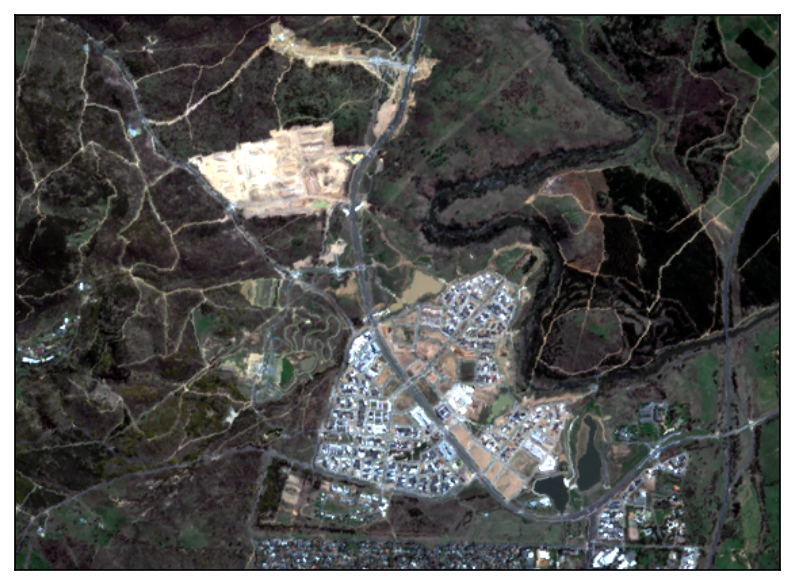

In [8]:
plot(L_0_satellite)

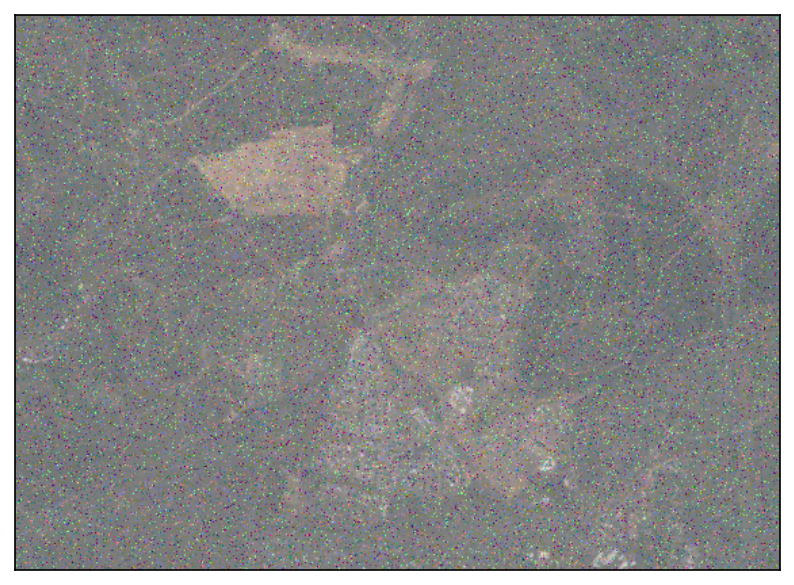

In [9]:
#generate a problem
M_0_satellite, C_0_satellite = add_noise(L_0_satellite, .1, 1/25)
plot(M_0_satellite)

In [10]:
#apply the algorithm
L_satellite, C_satellite = trpca(M_0_satellite)

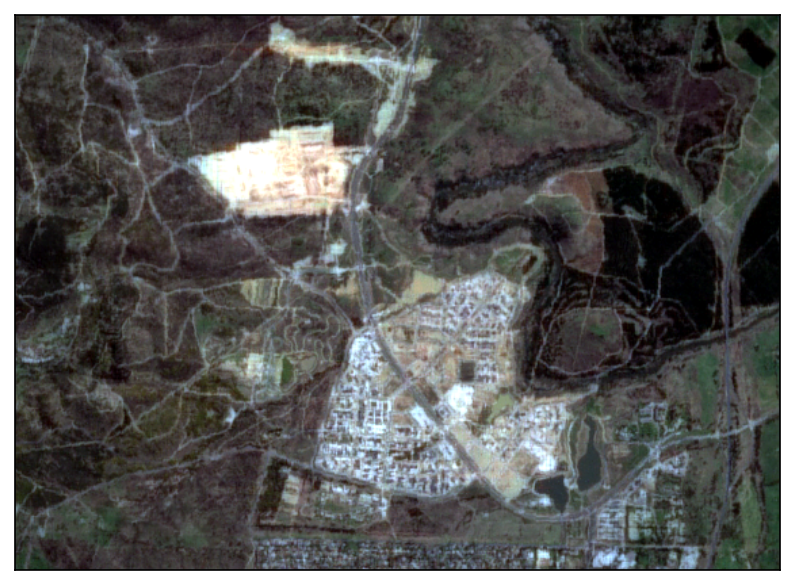

In [11]:
#see if it worked
plot(L_satellite)